## Validation Analysis for Selected Model (Random Forest)

In [17]:

import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load training and test data
train_data_path = "../data/processed/train_balanced_data.csv"
train_df = pd.read_csv(train_data_path)
X_train = train_df.drop(columns='Accident')
y_train = train_df['Accident']

test_data_path = "../data/processed/test_balanced_data.csv"
test_df = pd.read_csv(test_data_path)
X_test = test_df.drop(columns='Accident')
y_test = test_df['Accident']

# Load the Random Forest model
model_path = '../src/models/random_forest_model.pkl'
model = joblib.load(model_path)


### Performance on Train and Test Data

In [18]:

# Initialize dictionary to store metrics for train and test data
validation_metrics = {
    'Dataset': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': []
}

# Evaluate on training data
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]
validation_metrics['Dataset'].append('Train')
validation_metrics['Accuracy'].append(accuracy_score(y_train, y_train_pred))
validation_metrics['Precision'].append(precision_score(y_train, y_train_pred))
validation_metrics['Recall'].append(recall_score(y_train, y_train_pred))
validation_metrics['F1 Score'].append(f1_score(y_train, y_train_pred))
validation_metrics['AUC'].append(roc_auc_score(y_train, y_train_proba))

# Evaluate on test data
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]
validation_metrics['Dataset'].append('Test')
validation_metrics['Accuracy'].append(accuracy_score(y_test, y_test_pred))
validation_metrics['Precision'].append(precision_score(y_test, y_test_pred))
validation_metrics['Recall'].append(recall_score(y_test, y_test_pred))
validation_metrics['F1 Score'].append(f1_score(y_test, y_test_pred))
validation_metrics['AUC'].append(roc_auc_score(y_test, y_test_proba))

# Convert validation metrics to DataFrame for easier display
validation_metrics_df = pd.DataFrame(validation_metrics)
validation_metrics_df


,Dataset,Accuracy,Precision,Recall,F1 Score,AUC
0,Train,1.000000,1.000000,1.000000,1.000000,1.000000
1,Test,0.577465,0.651639,0.742991,0.694323,0.526265


### Train vs. Test Performance Comparison for Random Forest

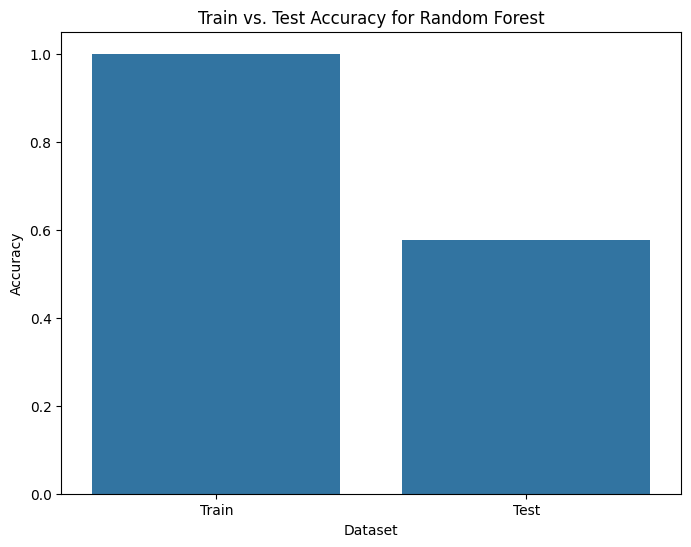

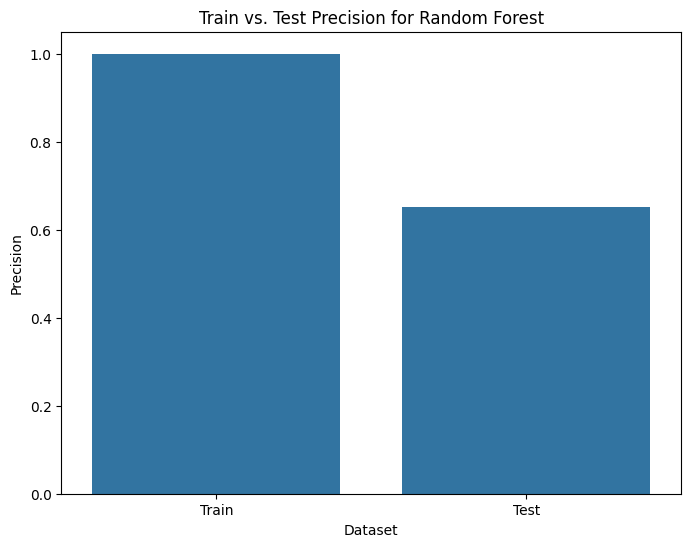

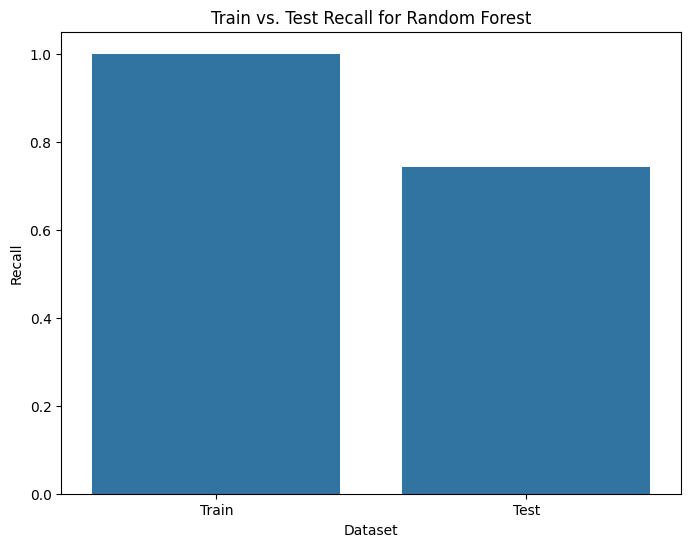

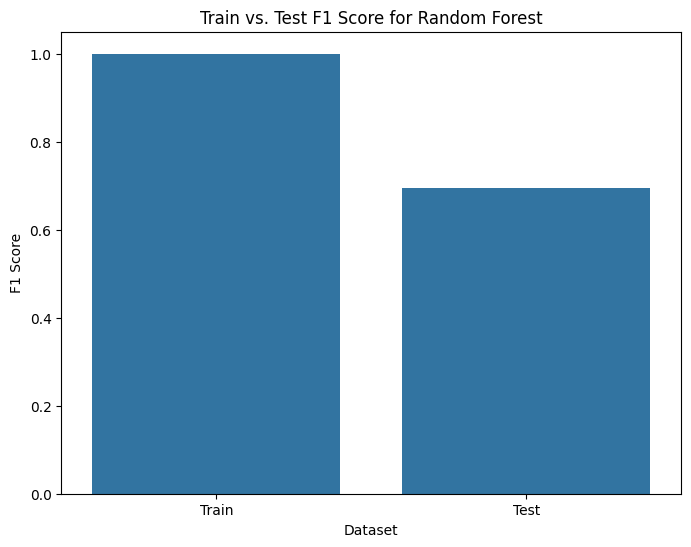

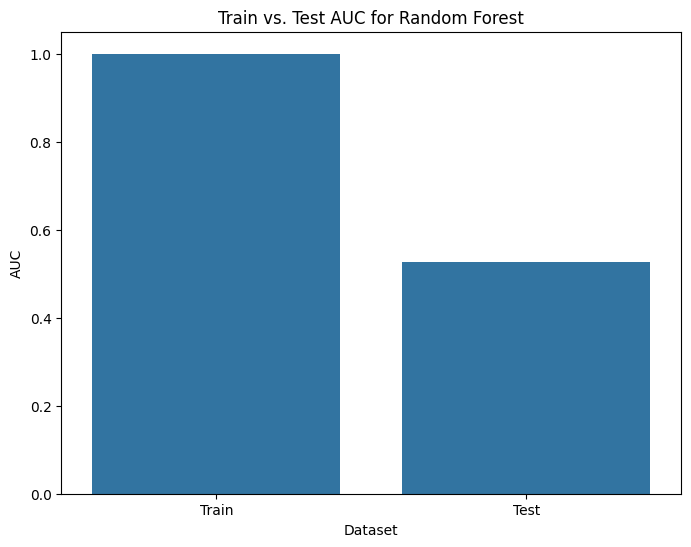

In [19]:

# Plot comparison of train and test metrics for Random Forest
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=validation_metrics_df, x='Dataset', y=metric)
    plt.title(f'Train vs. Test {metric} for Random Forest')
    plt.ylabel(metric)
    plt.show()
